<a href="https://colab.research.google.com/github/Utkarsha1407/Machine-Learning-Projects/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment on Classification technique
Every year many students give the GRE exam to get admission in foreign Universities. The data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable.
Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)
Data Set : https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. So to help the counselor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not.
a.       Apply Data pre-processing (Label Encoding, Data Transformation….) techniques if necessary.
b.      Perform data-preparation (Train-Test Split)
c.       Apply Machine Learning Algorithm
d.      Evaluate Model.


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/content/Admission_Predict.csv")

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [11]:
df.shape

(400, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [13]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [14]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [15]:
df.nunique()

,0
Serial No.,400
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,168
Research,2
Chance of Admit,60


Drop features containing unique values

In [16]:
df.drop(columns=["Serial No."],axis=1, inplace=True)

In [17]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


The last column needs to be changed 0 or 1

In [18]:
df["Chance of Admit "]=[np.round(i) for i in df["Chance of Admit "]]

In [19]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,1.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,1.0


In [20]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
df.skew()

,0
GRE Score,-0.062893
TOEFL Score,0.057216
University Rating,0.171260
SOP,-0.275761
LOR,-0.106991
CGPA,-0.065991
Research,-0.191582
Chance of Admit,-2.930670


/tmp/ipython-input-1346547198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GRE Score"])


<Axes: xlabel='GRE Score', ylabel='Density'>

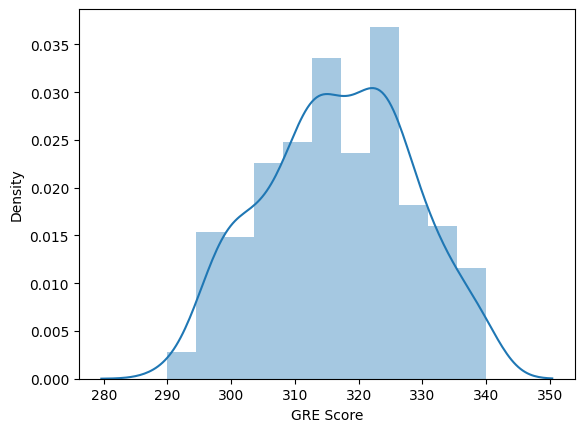

In [22]:
sns.distplot(df["GRE Score"])

Check outliers -->If most students score between 60–80 marks, but one student scores 5 marks or 100 marks, those are outliers.

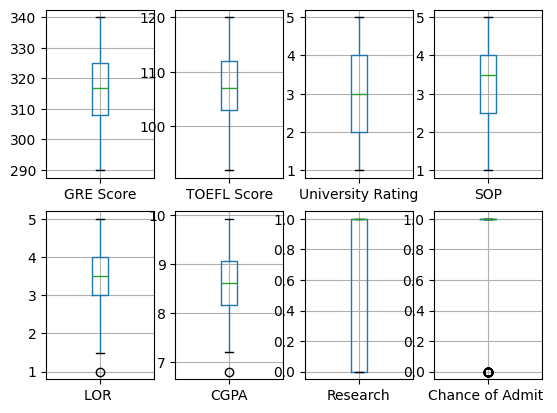

In [23]:
for i, col in enumerate(df.columns):
  plt.subplot(2,4, i+1)
  df.boxplot(col)

In [24]:
df["Chance of Admit "].value_counts()

,count
Chance of Admit,
1.0,365
0.0,35


Determine the dataset is balanced or not

<Axes: xlabel='Chance of Admit '>

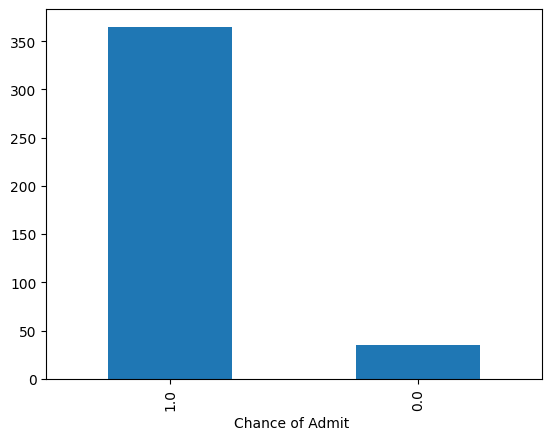

In [25]:
df['Chance of Admit '].value_counts().plot(kind='bar')

<Axes: xlabel='Chance of Admit ', ylabel='count'>

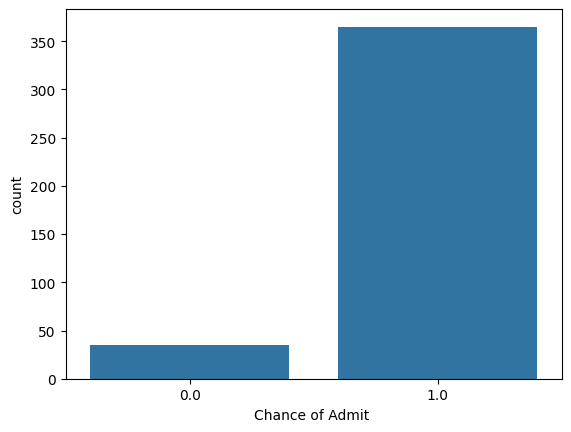

In [26]:
sns.countplot(x=df['Chance of Admit '])

In [27]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.astype(int)

In [28]:
x[:3]
y[:3]

array([1, 1, 1])

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
oversampling=SMOTE()

In [31]:
x_sample,y_sample=oversampling.fit_resample(x,y)

In [32]:
x_sample.shape

(730, 7)

In [33]:
 y_sample.shape

(730,)

<Axes: ylabel='count'>

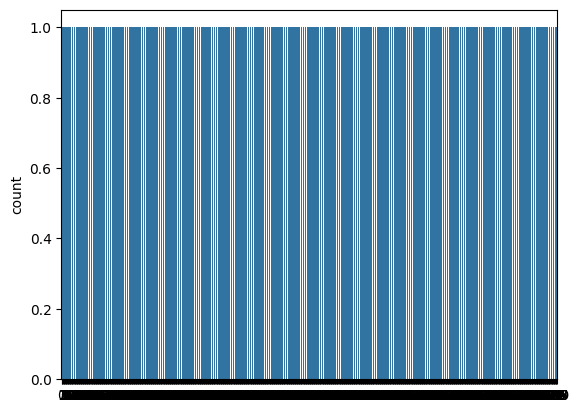

In [34]:
sns.countplot(y_sample)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x_sample,y_sample,train_size=0.8,random_state=42)

In [37]:
x_train.shape

(584, 7)

In [38]:
y_train.shape

(584,)

In [39]:
x_test.shape

(146, 7)

In [40]:
y_test.shape

(146,)

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [44]:
x_train_scale[:3]

array([[ 0.09402792,  0.05369517, -0.59802983, -0.4408502 ,  0.57784207,
         0.44313818, -0.83970322],
       [ 1.25991478,  1.1523397 ,  1.32708147,  1.01774146,  1.68261225,
         1.41890473,  1.34111166],
       [ 0.43015756,  0.21064439, -0.59802983, -0.90942105, -0.52692812,
        -0.8115126 , -0.76064097]])

Decision Tree classifier


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
classifier = DecisionTreeClassifier()

In [47]:
classifier.fit(x_train_scale,y_train)

DecisionTreeClassifier()

In [48]:
y_predict = classifier.predict(x_test_scale)

In [49]:
y_predict

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [50]:
pd.DataFrame({"actual values":y_test,"predicted values":y_predict})

,actual values,predicted values
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
141,0,0
142,1,1
143,1,1
144,1,1


Visualize decsion tree

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [52]:
confusion_matrix(y_test,y_predict)

array([[66,  2],
       [ 8, 70]])

In [53]:
accuracy_score(y_test,y_predict)

0.9315068493150684

In [54]:
precision_score(y_test,y_predict)

0.9722222222222222

In [55]:
recall_score(y_test,y_predict)

0.8974358974358975

In [56]:
f1_score(y_test,y_predict)

0.9333333333333333

In [57]:
from sklearn.tree import plot_tree

[Text(0.551747311827957, 0.9615384615384616, 'CGPA <= -0.117\ngini = 0.5\nsamples = 584\nvalue = [297, 287]\nclass = 0'),
 Text(0.35618279569892475, 0.8846153846153846, 'LOR  <= 0.566\ngini = 0.246\nsamples = 313\nvalue = [268, 45]\nclass = 0'),
 Text(0.4539650537634409, 0.9230769230769231, 'True  '),
 Text(0.2553763440860215, 0.8076923076923077, 'University Rating <= -1.56\ngini = 0.201\nsamples = 300\nvalue = [266, 34]\nclass = 0'),
 Text(0.16129032258064516, 0.7307692307692307, 'CGPA <= -0.85\ngini = 0.472\nsamples = 34\nvalue = [21, 13]\nclass = 0'),
 Text(0.08602150537634409, 0.6538461538461539, 'GRE Score <= -0.693\ngini = 0.227\nsamples = 23\nvalue = [20, 3]\nclass = 0'),
 Text(0.043010752688172046, 0.5769230769230769, 'LOR  <= -0.527\ngini = 0.095\nsamples = 20\nvalue = [19, 1]\nclass = 0'),
 Text(0.021505376344086023, 0.5, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = 0'),
 Text(0.06451612903225806, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.1290

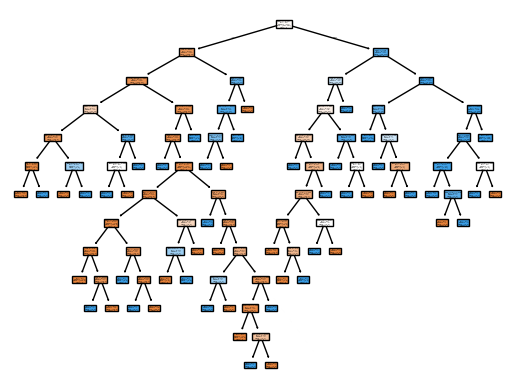

In [58]:
plot_tree(decision_tree=classifier,feature_names=df.columns,class_names=["0","1"],filled=True)

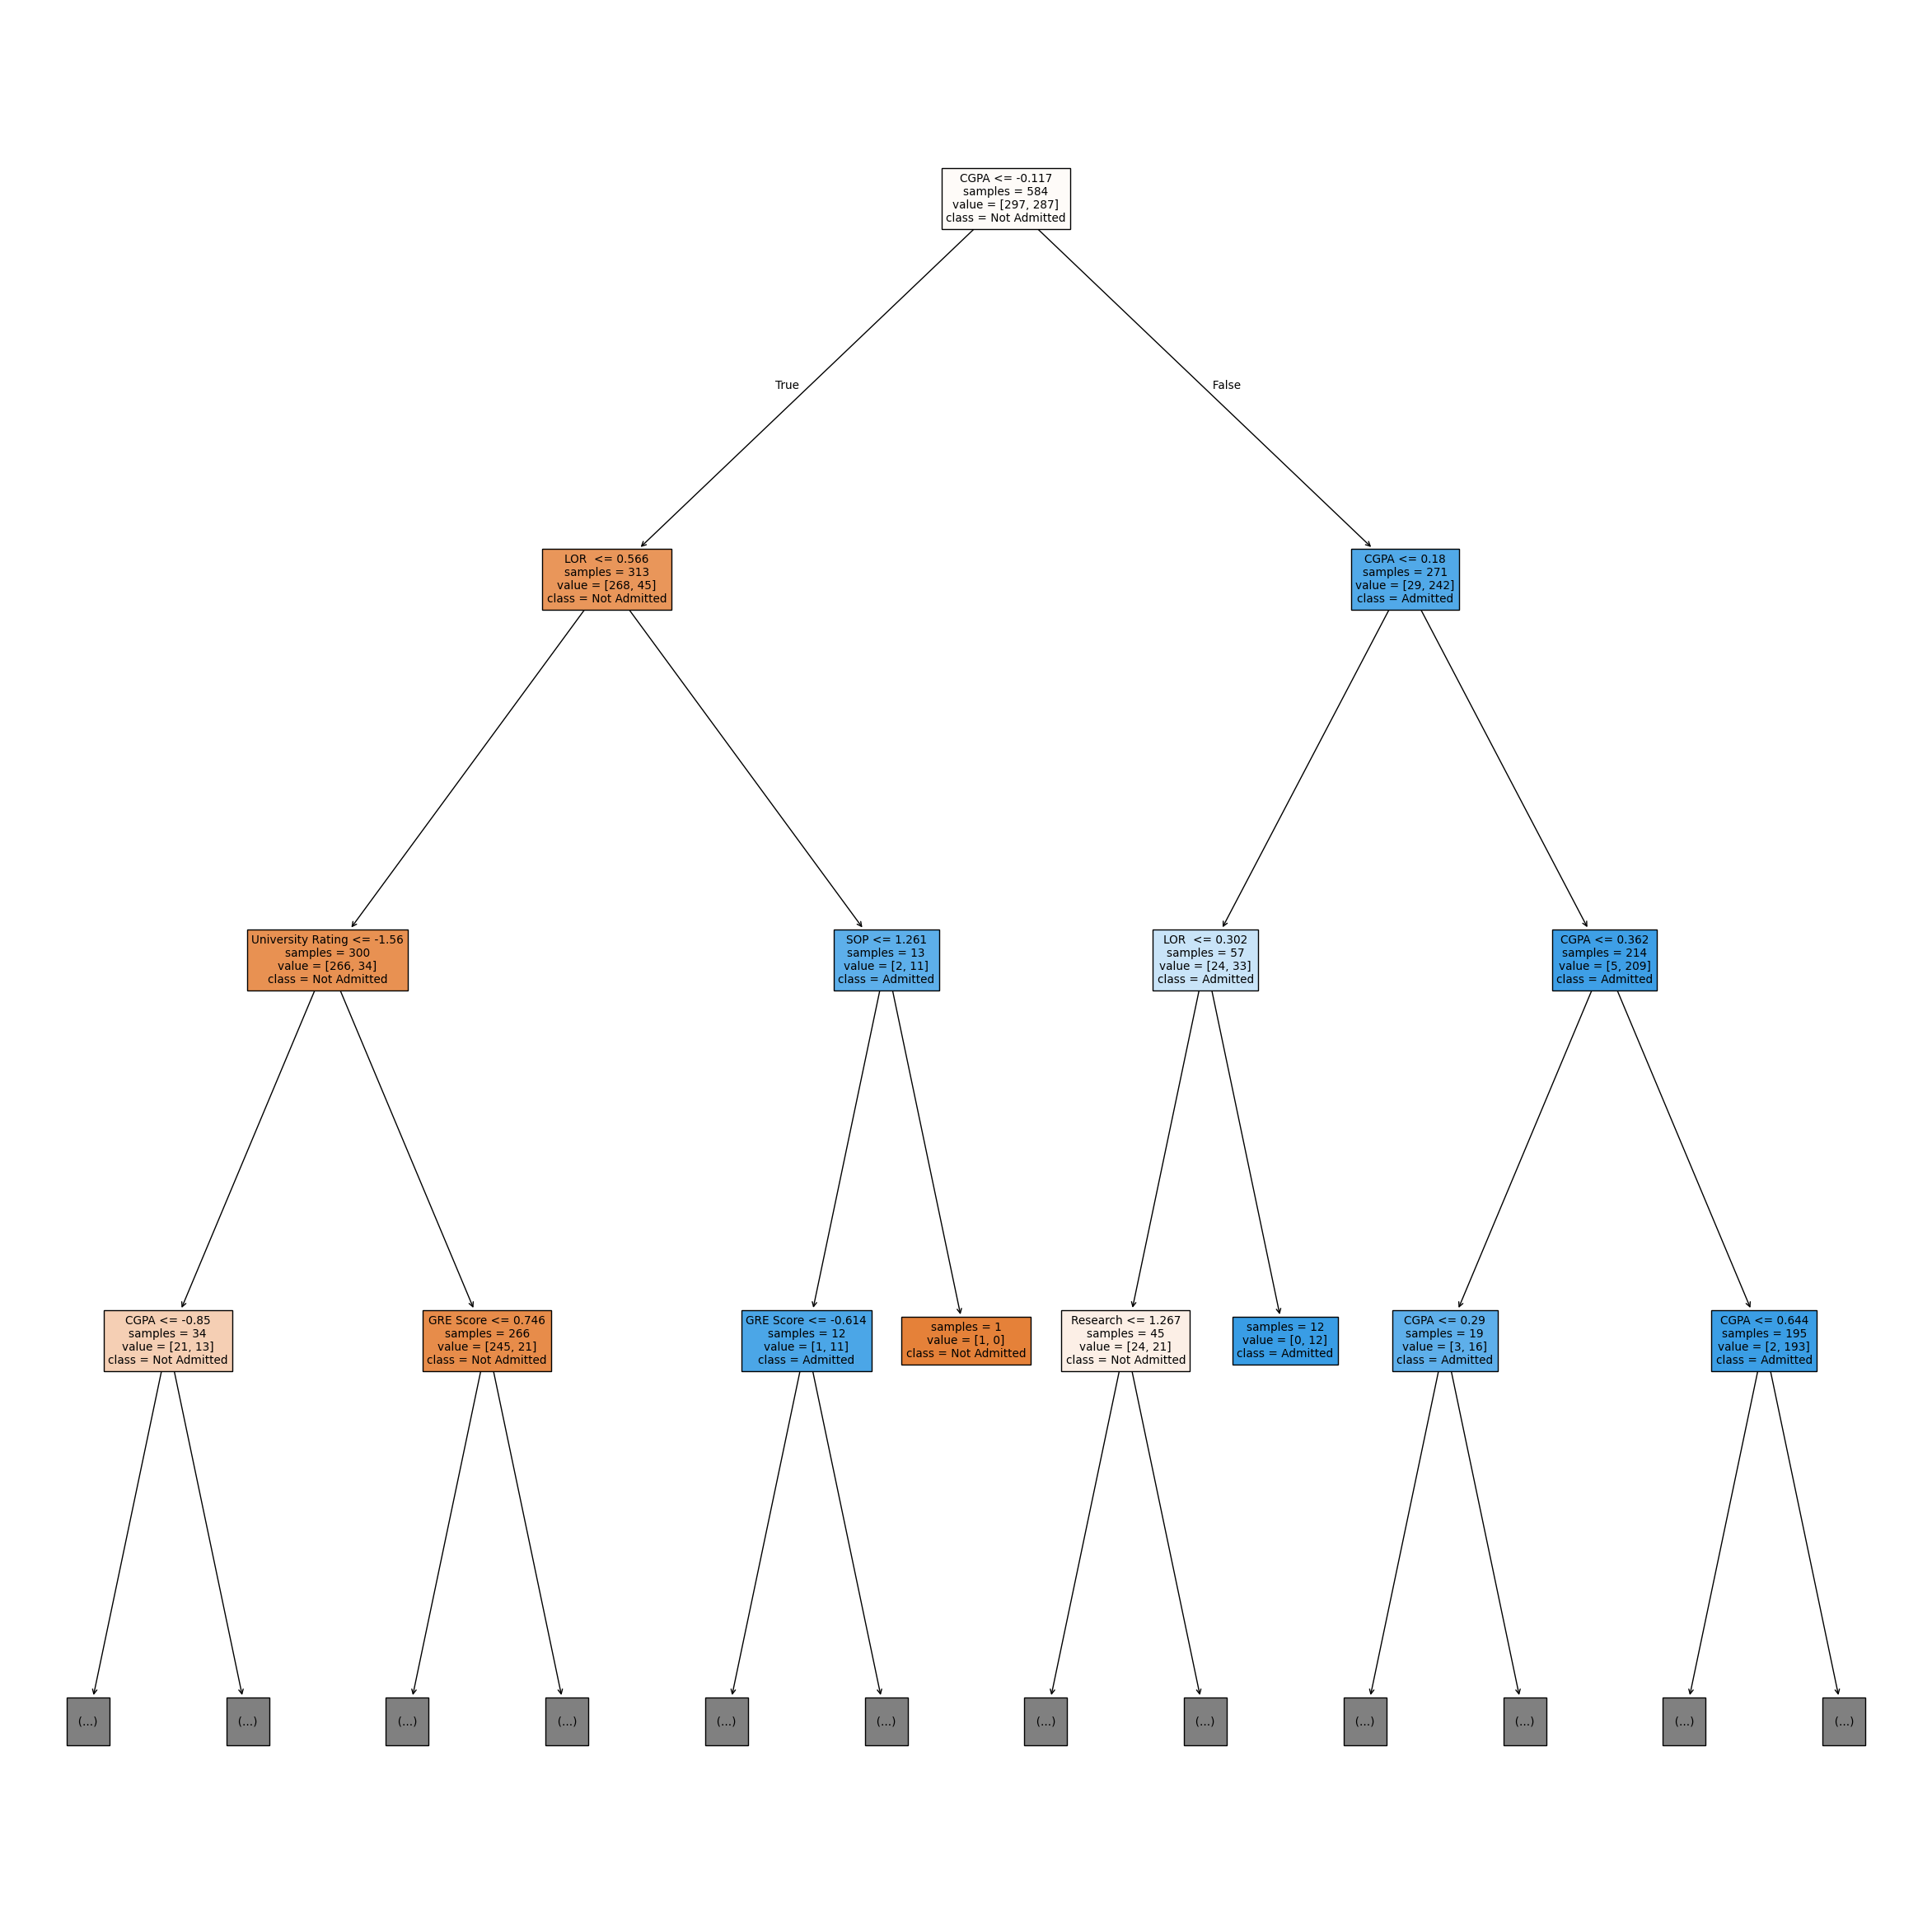

In [59]:
plt.figure(figsize = (30, 30))
plot_tree(decision_tree = classifier , filled = True , max_depth = 3 , feature_names = df.columns[:-1], class_names = ['Not Admitted', 'Admitted'], impurity = False)
plt.show()